In [15]:
# path loacted at "E:\geodata\gebco_2024_sub_ice_topo\GEBCO_2024_sub_ice_topo.nc"

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [17]:
# Load the NetCDF file
ds = xr.open_dataset("E:/geodata/gebco_2024_sub_ice_topo/GEBCO_2024_sub_ice_topo.nc")

In [18]:
# Select region bounds
lon_min, lon_max = -94, -88
lat_min, lat_max = 27.5, 30.5

# Subset the data
subset = ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

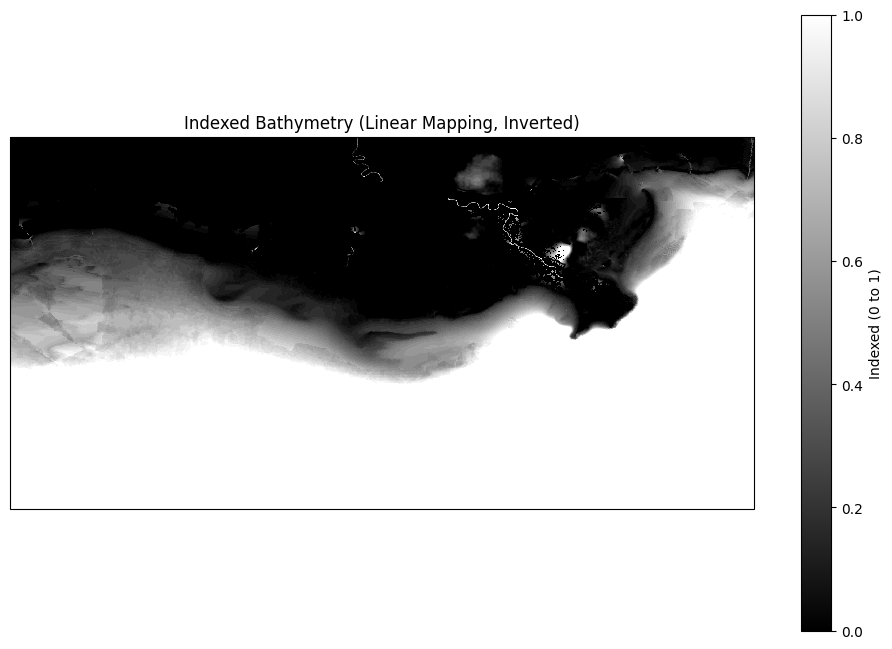

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Extract bathymetry data from the subset
bathymetry = subset['elevation']  # GEBCO uses 'elevation' as the variable name
bathy = bathymetry.values if hasattr(bathymetry, 'values') else bathymetry
indexed_bathymetry = np.zeros_like(bathy, dtype=np.float32)

min_bathy, max_bathy = -30, -3

# Apply linear mapping between min and max
mask = (bathy >= min_bathy) & (bathy <= max_bathy)
indexed_bathymetry[mask] = (bathy[mask] - min_bathy) / (max_bathy - min_bathy)

# Set values above max to 1
indexed_bathymetry[bathy > max_bathy] = 1.0

# Values below min_bathy remain 0 (already initialized)

# Invert the map vertically before plotting
indexed_bathymetry_inverted = 1.0 - indexed_bathymetry

# Plotting
plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
im = ax.pcolormesh(subset['lon'], subset['lat'], indexed_bathymetry_inverted, cmap='gray', shading='auto', vmin=0, vmax=1)
ax.coastlines()
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
plt.colorbar(im, label='Indexed (0 to 1)')
plt.title('Indexed Bathymetry (Linear Mapping, Inverted)')
plt.show()

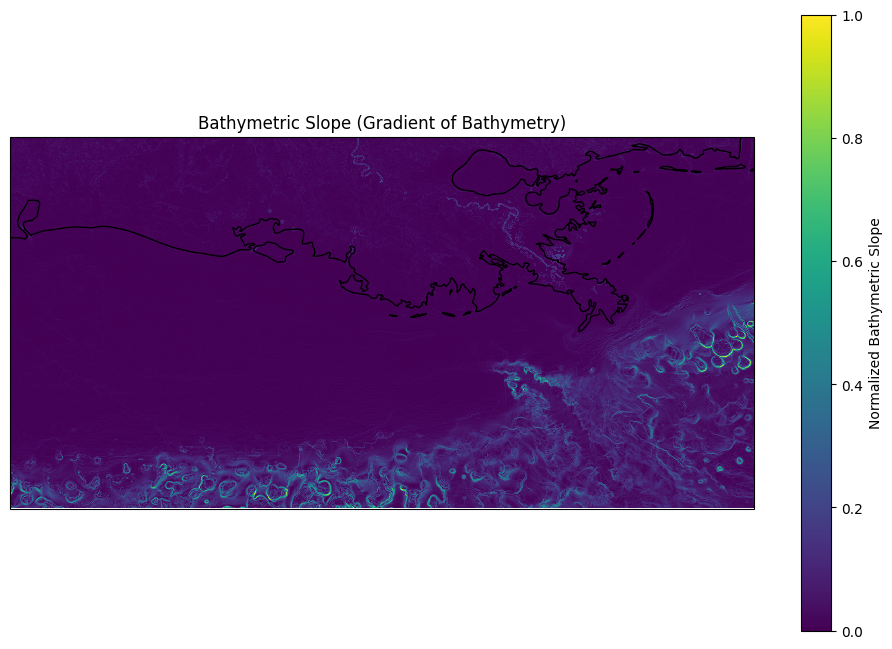

In [20]:
# --- Slope Calculation ---
# Assumes regular grid spacing
dy, dx = np.gradient(bathy)
slope = np.sqrt(dx**2 + dy**2)

# Optional: Normalize slope for plotting or masking
normalized_slope = slope / np.nanmax(slope)



# --- Plot 2: Bathymetric Slope ---
plt.figure(figsize=(12,8))
ax2 = plt.axes(projection=ccrs.PlateCarree())
im2 = ax2.pcolormesh(subset['lon'], subset['lat'], normalized_slope, cmap='viridis', shading='auto', vmin=0, vmax=1)
ax2.coastlines()
ax2.set_extent([lon_min, lon_max, lat_min, lat_max])
plt.colorbar(im2, label='Normalized Bathymetric Slope')
plt.title('Bathymetric Slope (Gradient of Bathymetry)')
plt.show()


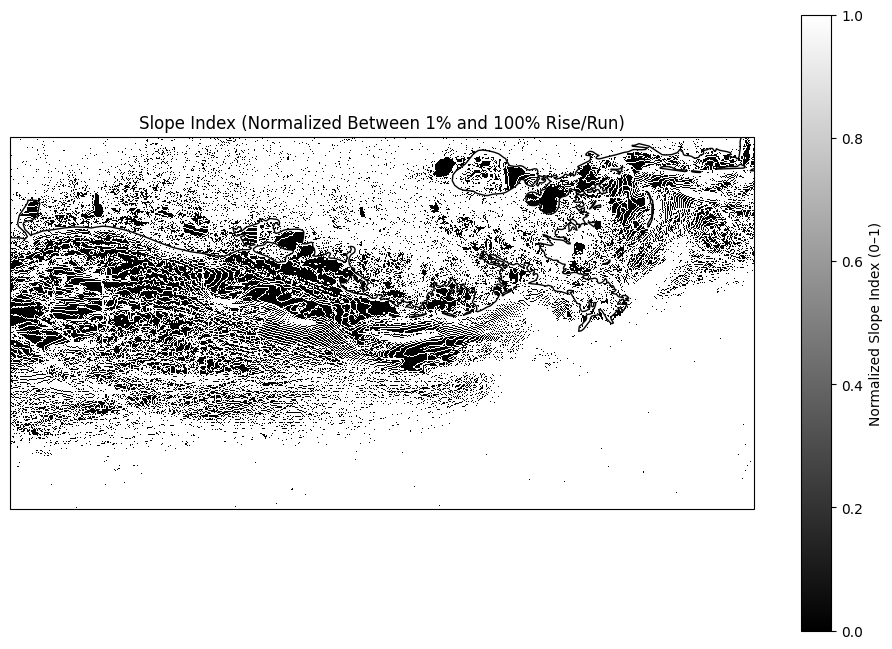

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Compute slope
dy, dx = np.gradient(bathy)
slope = np.sqrt(dx**2 + dy**2)

# Define normalization thresholds (rise/run)
min_slope, max_slope = 0.01, 0.1

# Initialize slope index
indexed_slope = np.zeros_like(slope, dtype=np.float32)

# Apply linear normalization between min_slope and max_slope
within_range = (slope >= min_slope) & (slope <= max_slope)
indexed_slope[within_range] = (slope[within_range] - min_slope) / (max_slope - min_slope)

# Values below min_slope remain 0
# Values above max_slope get set to 1
indexed_slope[slope > max_slope] = 1.0

# Plotting
plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
im = ax.pcolormesh(subset['lon'], subset['lat'], indexed_slope, cmap='gray', shading='auto', vmin=0, vmax=1)
ax.coastlines()
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
plt.colorbar(im, label='Normalized Slope Index (0–1)')
plt.title('Slope Index (Normalized Between 1% and 100% Rise/Run)')
plt.show()
